In [131]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [132]:
import os
os.getcwd()

'C:\\IIIT-B\\casestudy\\DD_WORK\\EDA\\GramenerCaseStudy-master\\GramenerCaseStudy-master\\data'

In [133]:
%cd "C:\IIIT-B\casestudy\DD_WORK\EDA\GramenerCaseStudy-master\GramenerCaseStudy-master\data" 

C:\IIIT-B\casestudy\DD_WORK\EDA\GramenerCaseStudy-master\GramenerCaseStudy-master\data


# Read data

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loan_dataset = pd.read_csv('../data/loan.csv', encoding = 'ISO-8859-1')

loan_dataset.shape

C:\Users\DD\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(39717, 111)

In [135]:
loan_dataset.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data cleaning

In [136]:
loan_nulls = loan_dataset.isnull().sum()
loan_nulls_percent = round(100*(loan_dataset.isnull().sum()/len(loan_dataset.index)), 2)

loan_nulls_detials = pd.concat([loan_nulls, loan_nulls_percent], axis=1)
loan_nulls_detials.rename(columns={0: 'no_of_nulls', 1: 'percent_of_nulls'}, inplace=True)
loan_nulls_detials.groupby(['percent_of_nulls']).agg('count') #.sort_values(ascending=False)

,no_of_nulls
percent_of_nulls,
0.00,43
0.01,1
0.03,1
0.10,1
0.13,1
0.14,2
0.18,1
1.75,1
2.71,1


In [137]:
#loan_nulls_detials.to_csv('out.csv')

In [138]:
#Droping all the columns where there are more than 90% of Nulls
loan_dataset_cleaned = loan_dataset.dropna(thresh = len(loan_dataset) * .1, axis = 1)
loan_dataset_cleaned.shape

(39717, 55)

In [139]:
# Drop rows with more than 30% NaN Values
loan_dataset_cleaned = loan_dataset_cleaned.dropna(how='all')
loan_dataset_cleaned.shape

(39717, 55)

In [140]:
# Find out how many columns have single value
single_value_columns = loan_dataset_cleaned.nunique()
single_value_columns = single_value_columns[single_value_columns.values==1]
single_value_columns

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [141]:
# Drop all columns where there are single values
loan_dataset_cleaned.drop(labels = list(single_value_columns.index), axis = 1, inplace = True)


In [142]:
print(loan_dataset_cleaned.shape)
loan_dataset_cleaned

(39717, 46)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.0000,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.1100,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.0000,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.0000,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.0000,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.0000,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.0000,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.0000,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,646.02,162.02,294.94,0.00,189.06,2.0900,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,1469.34,673.48,533.42,0.00,269.29,2.5200,Nov-12,121.45,Mar-13,0.0


In [143]:
round(100*(loan_dataset_cleaned.isnull().sum()/len(loan_dataset_cleaned.index)), 2)

id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
grade                       0.00
sub_grade                   0.00
emp_title                   6.19
emp_length                  2.71
home_ownership              0.00
annual_inc                  0.00
verification_status         0.00
issue_d                     0.00
loan_status                 0.00
url                         0.00
desc                       32.58
purpose                     0.00
title                       0.03
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
mths_since_last_delinq     64.66
open_acc                    0.00
pub_rec                     0.00
revol_bal 

In [144]:
#Update emp_length to 'Self' when both emp_title and emp_length is blank
#loan_dataset_cleaned['emp_length'] = np.where((loan_dataset_cleaned.emp_title.isnull() & 
#                                              loan_dataset_cleaned.emp_length.isnull()), 
#                                             'Self', np.nan)


In [145]:
#lambda (loan_dataset_cleaned['emp_length'].apply : 'Self' if loan_dataset_cleaned.emp_length.str.strip() == '' else "Something")

In [146]:
loan_dataset_cleaned.emp_length.fillna('0',inplace=True)
loan_dataset_cleaned.mths_since_last_delinq.fillna(0,inplace=True)

In [147]:
# deleting unwanted columns like url, zip code and desc
loan_dataset_cleaned.drop(labels = ["url","zip_code","desc"], axis =1, inplace=True)

In [148]:
loan_dataset_cleaned.shape

(39717, 43)

In [149]:
round(100*(loan_dataset_cleaned.isnull().sum()/len(loan_dataset_cleaned.index)), 2)

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_title                  6.19
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
mths_since_last_delinq     0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prnc

In [150]:
#loan_dataset_cleaned.to_csv('loan_dataset_cleaned.csv')

In [151]:
loan_dataset_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [152]:
# Check for duplicate columns, there are none
#loan_dataset_cleaned = loan_dataset_cleaned[loan_dataset_cleaned.duplicated(['loan_amnt', 'funded_amnt'],keep=False)]
loan_dataset_cleaned = loan_dataset_cleaned.loc[:, ~loan_dataset_cleaned.columns.duplicated()]
loan_dataset_cleaned.shape

(39717, 43)

In [153]:
# Number of blank employee titles

print(loan_dataset_cleaned.emp_title.isnull().sum())

2459


In [154]:
# convert continuous variables to numeric
# remove the % sign in int_rate
loan_dataset_cleaned['int_rate'] = loan_dataset_cleaned['int_rate'].str[:-1]
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

loan_dataset_cleaned[numeric_columns] = loan_dataset_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')
loan_dataset_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 43 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null float64
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 39717 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
purpose                    39717 non-null object
title    

# Derived Metrics

### Type driven derived metrics

In [155]:
# Create year and month columns from issue date column

loan_dataset_cleaned['issue_month'] = loan_dataset_cleaned['issue_d'].str.split("-").str[0]
loan_dataset_cleaned['issue_year'] = loan_dataset_cleaned['issue_d'].str.split("-").str[-1]
# convert year to the format YYYY - add 20 before the year 
loan_dataset_cleaned['issue_year'] = '20' + loan_dataset_cleaned.issue_year
loan_dataset_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,Dec,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,Dec,2011


### Business driven derived metrics

In [156]:
# Create ranges for annual income
loan_dataset_cleaned['annual_inc'].describe()


count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

The range (min, max) values is between 4000 and 294000. So the bins can start from 0 and go up to 500000.

In [157]:
bins = [0, 20000, 40000, 60000, 80000,100000,500000]
bin_labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000','100000 and above']
loan_dataset_cleaned['annual_inc_range'] = pd.cut(loan_dataset_cleaned['annual_inc'], bins, labels=bin_labels)
loan_dataset_cleaned[['annual_inc','annual_inc_range']].head(20)

,annual_inc,annual_inc_range
0,24000.00,20000-40000
1,30000.00,20000-40000
2,12252.00,0-20000
3,49200.00,40000-60000
4,80000.00,60000-80000
5,36000.00,20000-40000
6,47004.00,40000-60000
7,48000.00,40000-60000
8,40000.00,20000-40000
9,15000.00,0-20000


In [158]:
# Create ranges for interest rate
loan_dataset_cleaned['int_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

The range (min, max) values is between 5.42 and 24.59. So the bins can start from 0 and go up to 25.

In [159]:
bins = [0, 7.5, 10, 12.5, 15,20]
bin_labels = ['0-7.5','7.5-10', '10-12.5', '12.5-15','15-above']
loan_dataset_cleaned['int_rate_range'] = pd.cut(loan_dataset_cleaned['int_rate'], bins, labels=bin_labels)
loan_dataset_cleaned[['int_rate','int_rate_range']].head()

,int_rate,int_rate_range
0,10.65,10-12.5
1,15.27,15-above
2,15.96,15-above
3,13.49,12.5-15
4,12.69,12.5-15


### Data driven derived metrics

In [160]:
# Create new variable for Default Status

loan_dataset_cleaned.loc[loan_dataset_cleaned['loan_status'] == 'Charged Off', 'loan_status_modf'] = '1:Default' ## Default 
loan_dataset_cleaned.loc[loan_dataset_cleaned['loan_status'] == 'Current', 'loan_status_modf'] = '0:Non Default' ## Non Default
loan_dataset_cleaned.loc[loan_dataset_cleaned['loan_status'] == 'Fully Paid', 'loan_status_modf'] = '0:Non Default' ## Non Default
loan_dataset_cleaned.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,issue_month,issue_year,annual_inc_range,int_rate_range,loan_status_modf
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.00,Jan-15,171.62,May-16,0.0,Dec,2011,20000-40000,10-12.5,0:Non Default
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1.11,Apr-13,119.66,Sep-13,0.0,Dec,2011,20000-40000,15-above,1:Default
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.00,Jun-14,649.91,May-16,0.0,Dec,2011,0-20000,15-above,0:Non Default
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.00,Jan-15,357.48,Apr-16,0.0,Dec,2011,40000-60000,12.5-15,0:Non Default
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,0.00,May-16,67.79,May-16,0.0,Dec,2011,60000-80000,12.5-15,0:Non Default


# Univariate Analysis

Here are the unordered,ordered and quantitative variables

Unordered - purpose,home_ownership,addr_state, verification_status

Ordered - loan_status,term, issue_year,Grade,Sub-grade,issue_month 


Quantitative variables - loan_amnt,annual_inc,int_rate,dti

## Plotting unordered categorical variables

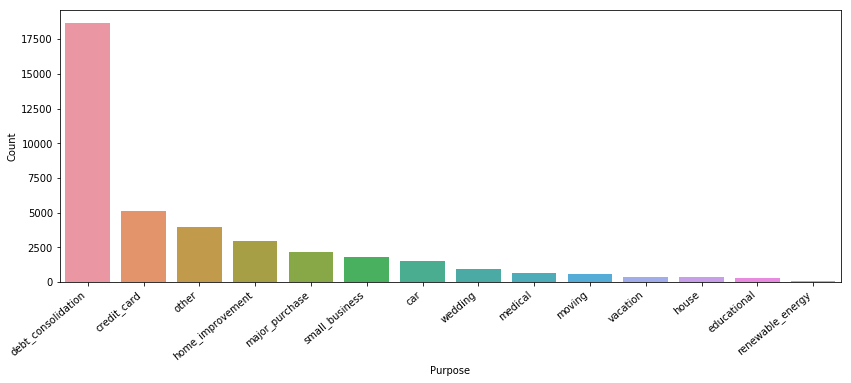

In [161]:
# For unordered categorical variables, use count plot
# count plot for 'purpose'
plt.figure(figsize=(14, 5))
fig = sns.countplot(loan_dataset_cleaned.purpose.dropna(), order = loan_dataset_cleaned.purpose.value_counts().index)
fig.set(xlabel='Purpose', ylabel='Count')
fig.set_xticklabels(fig.get_xticklabels(), rotation=40, ha="right")


plt.show()

Observations: Max number of loans are taken for debt_consolidation

[Text(0,0.5,'Count'), Text(0.5,0,'Home ownership')]

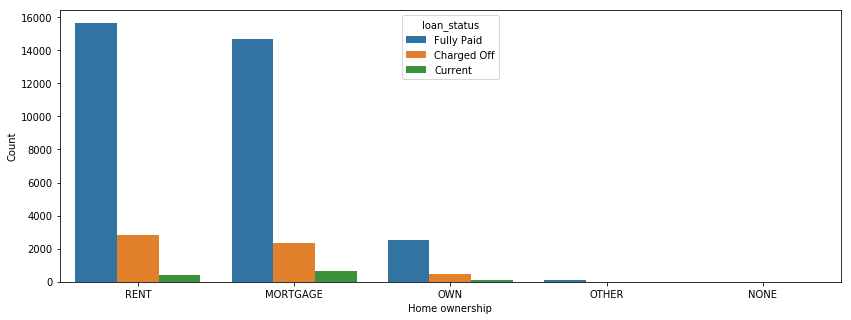

In [162]:
# count plot for home_ownership
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.home_ownership.dropna(), order = loan_dataset_cleaned.home_ownership.value_counts().index,hue=loan_dataset_cleaned.loan_status)
fig.set(xlabel='Home ownership', ylabel='Count')

Observations:Majority of applicants reside in a rented home or an a mortgage.

In [163]:
# remove the entries for "Other" and "None" in home_ownership
rem = ['OTHER', 'NONE', 'ANY']
loan_dataset_cleaned.drop(loan_dataset_cleaned[loan_dataset_cleaned['home_ownership'].isin(rem)].index,inplace=True)


[Text(0,0.5,'Count'), Text(0.5,0,'Home ownership')]

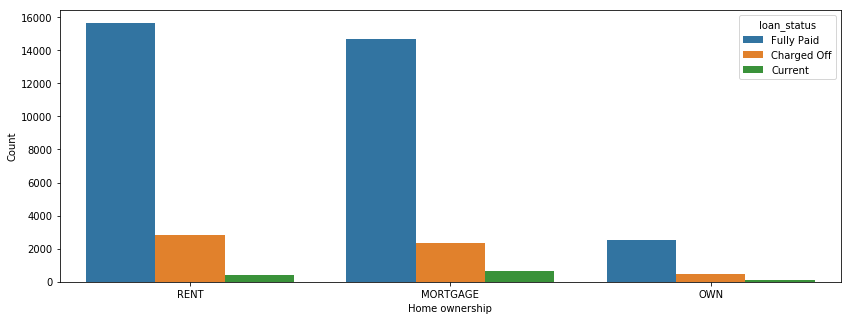

In [164]:
# count plot for home_ownership
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.home_ownership.dropna(), order = loan_dataset_cleaned.home_ownership.value_counts().index,hue=loan_dataset_cleaned.loan_status)
fig.set(xlabel='Home ownership', ylabel='Count')

[Text(0,0.5,'Count'), Text(0.5,0,'State')]

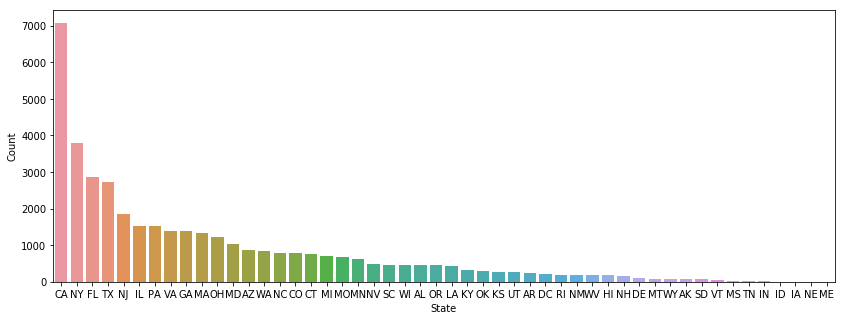

In [165]:
# count plot for state
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.addr_state.dropna(), order = loan_dataset_cleaned.addr_state.value_counts().index)
fig.set(xlabel='State', ylabel='Count')

Observations: CA followed by NY have the most number of loan applicants

[Text(0,0.5,'Count'), Text(0.5,0,'Verification status')]

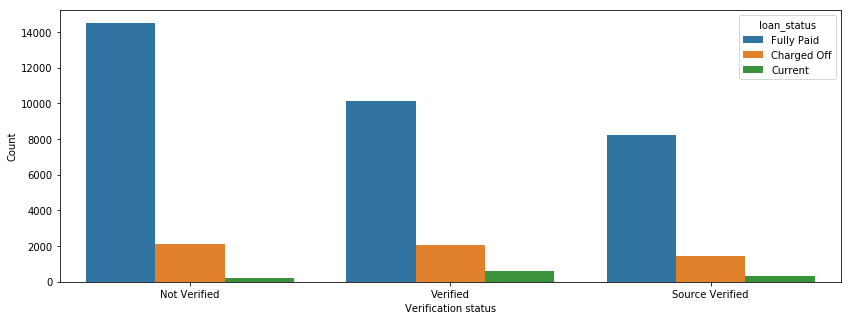

In [166]:
# countplot for verification status
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.verification_status.dropna(), order = loan_dataset_cleaned.verification_status.value_counts().index,hue=loan_dataset_cleaned.loan_status)
fig.set(xlabel='Verification status', ylabel='Count')

Observations: Most of the applicants are not verified - which is an interesting point to note!

## Plotting ordered categorical variables

[Text(0,0.5,'Count'), Text(0.5,0,'Loan status')]

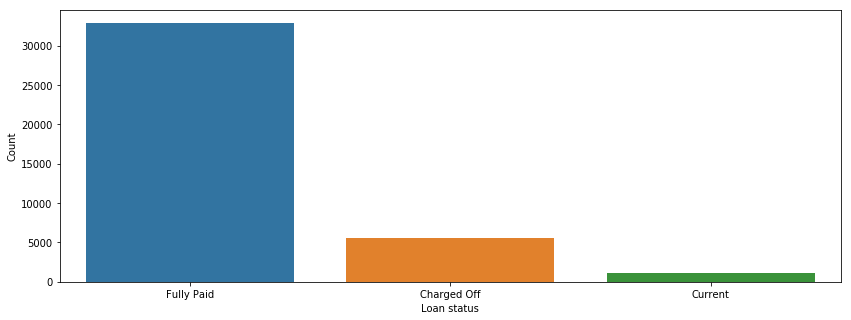

In [167]:
#countplot for loan status
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.loan_status.dropna(), order = loan_dataset_cleaned.loan_status.value_counts().index)
fig.set(xlabel='Loan status', ylabel='Count')

Observations: About 5000 applicants are charged off.

[Text(0,0.5,'Count'), Text(0.5,0,'Year of issue')]

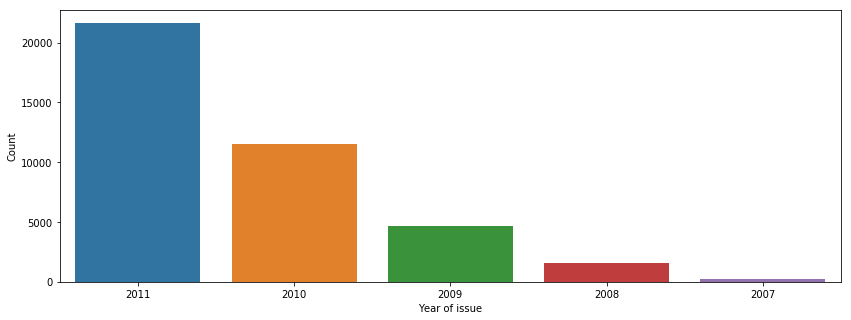

In [168]:
#countplot for year of issue
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.issue_year.dropna(), order = loan_dataset_cleaned.issue_year.value_counts().index)
fig.set(xlabel='Year of issue', ylabel='Count')

Observations: There is a steady increase in the number of applications from 2007 to 2011. Most of the applicants received their loan in 2011.

[Text(0,0.5,'Count'), Text(0.5,0,'Loan term')]

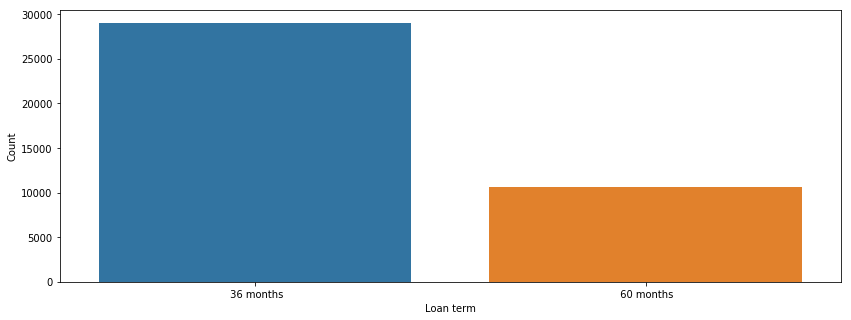

In [169]:
#countplot for loan term
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.term.dropna(),order = loan_dataset_cleaned.term.value_counts().index)
fig.set(xlabel='Loan term',ylabel='Count')

Observations: 70% of applicants applied for a loan of duration of 36 months.

[Text(0,0.5,'Count'), Text(0.5,0,'Grade')]

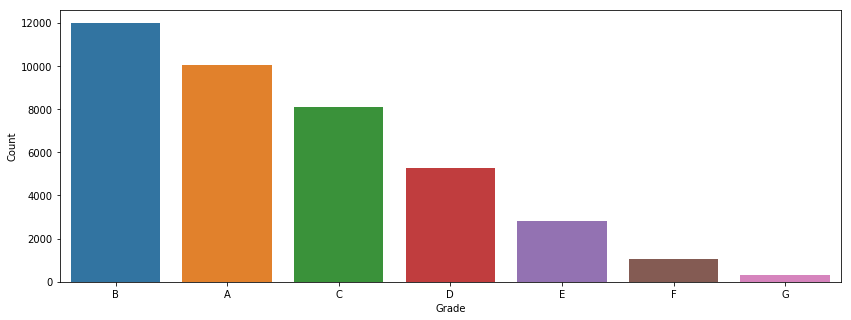

In [170]:
# countplot for grade
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.grade.dropna(),order = loan_dataset_cleaned.grade.value_counts().index)
fig.set(xlabel='Grade',ylabel='Count')

[Text(0,0.5,'Count'), Text(0.5,0,'Sub-Grade')]

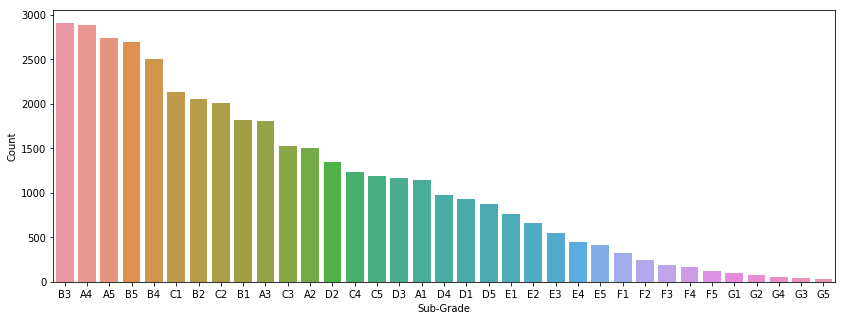

In [171]:
# countplot for sub-grade
plt.figure(figsize=(14,5))
fig = sns.countplot(loan_dataset_cleaned.sub_grade.dropna(),order = loan_dataset_cleaned.sub_grade.value_counts().index)
fig.set(xlabel='Sub-Grade',ylabel='Count')

## Plotting quantitative variables

[Text(0,0.5,'Count'), Text(0.5,0,'Loan amount')]

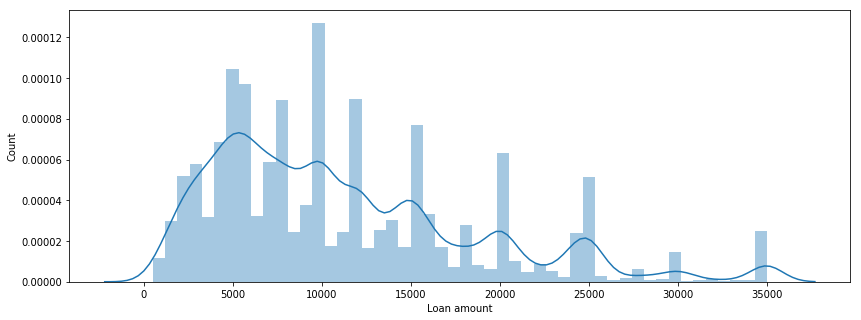

In [172]:
# Distribution plot for loan amount
plt.figure(figsize=(14,5))
fig = sns.distplot(loan_dataset_cleaned['loan_amnt'])
fig.set(xlabel='Loan amount',ylabel='Count')

Observations: Majority of the loan amounts applied for is between 5000 USD to 20000 USD

[Text(0,0.5,'Count'), Text(0.5,0,'Annual Income')]

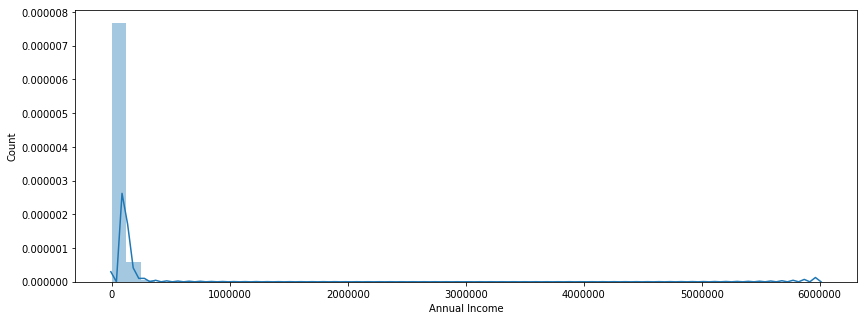

In [173]:
# Distribution plot for annual income
plt.figure(figsize=(14,5))
fig = sns.distplot(loan_dataset_cleaned['annual_inc'])
fig.set(xlabel='Annual Income',ylabel='Count')
#sns.boxplot(data = loan_dataset_cleaned, x='annual_inc',orient='v')

Observations: There are outliers in annual income column and will need to be excluded.

In [174]:
loan_dataset_cleaned["annual_inc"].describe()

count    3.961600e+04
mean     6.896224e+04
std      6.379013e+04
min      4.000000e+03
25%      4.044900e+04
50%      5.900000e+04
75%      8.229700e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Max value is 6000000 which is way above the mean value of 68962. So this value has to be excluded.

In [175]:
percent95 = loan_dataset_cleaned["annual_inc"].quantile(0.995)
loan_dataset_cleaned = loan_dataset_cleaned[loan_dataset_cleaned["annual_inc"] < percent95]
loan_dataset_cleaned["annual_inc"].describe()

count     39394.000000
mean      66378.442227
std       37410.922236
min        4000.000000
25%       40002.000000
50%       58758.000000
75%       81996.000000
max      294000.000000
Name: annual_inc, dtype: float64

[Text(0,0.5,'Count'), Text(0.5,0,'Annual Income')]

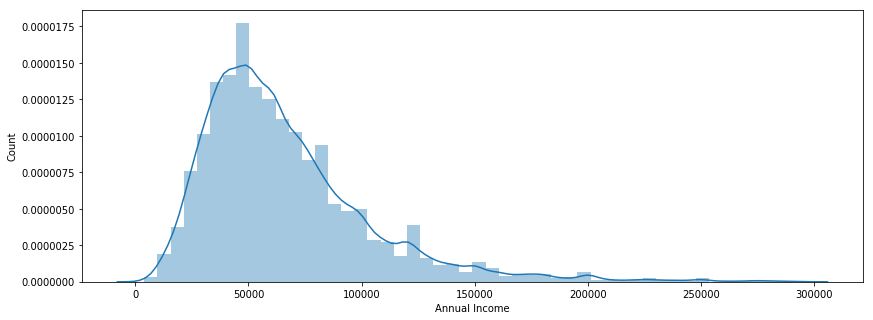

In [176]:

plt.figure(figsize=(14,5))
fig = sns.distplot(loan_dataset_cleaned['annual_inc'])
fig.set(xlabel='Annual Income',ylabel='Count')

Observations: Majority of the loan applicants have an annual income of 50000 USD to 100000 USD

[Text(0,0.5,'Count'), Text(0.5,0,'Interest rate')]

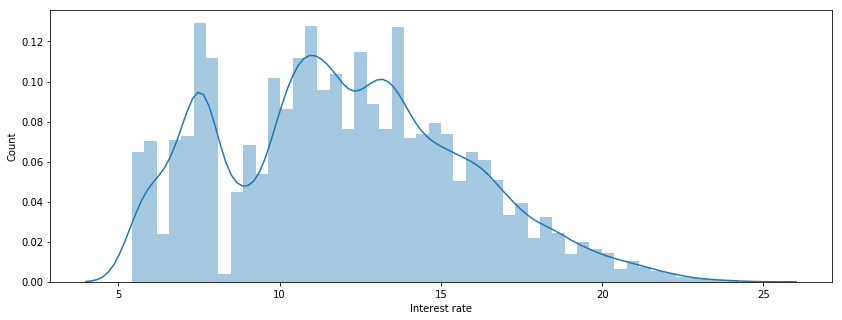

In [177]:
# Distribution plot for interest rate
plt.figure(figsize=(14,5))
fig = sns.distplot(loan_dataset_cleaned['int_rate'])
fig.set(xlabel='Interest rate',ylabel='Count')

Observations: The bulk of the loans are either between 7 to 9 percent or between 12 to 16 percent interest rate.

[Text(0,0.5,'Count'), Text(0.5,0,'DTI')]

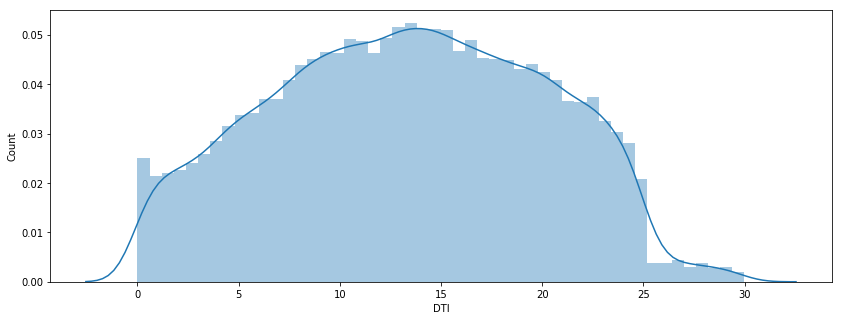

In [178]:
# Distribution plot for dti
plt.figure(figsize=(14,5))
fig = sns.distplot(loan_dataset_cleaned['dti'])
fig.set(xlabel='DTI',ylabel='Count')

Observations:

    DTI : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.


## Univariate Conclusions

1) Most of the loans are taken to consolidate debts from other loans.

2) Majority of applicants stay in rented or mortgaged house.

3) A significant number of loan applicants are from CA and NY.

4) Verification status does not seem to be of significance since most of the applicants are not verified.

5) A considerable number of applicants have charged off.

6) Most of the loans are issued in 2011.

7) About 70% of the loans are for a tenure of 36 months.

8) Grade does not seem to have any clear pattern - needs more analysis.

9) Most of the loan amount is between 5000-20000 USD.

10) A large portion of the applicants have an annual income of 50000 to 100000 USD.

11) THe most prevalent interest rates are 12 to 16 percent.

12) DTI needs to be further analysed.

# Bivariate Analysis

In [179]:
loan_dataset_cleaned1 =  loan_dataset_cleaned

In [180]:
loan_dataset_cleaned1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year', 'annual_inc_range',
       'int_rate_range', 'loan_status_modf'],
      dtype='object')

In [184]:
X_features = list( loan_dataset_cleaned1.columns )

In [185]:
# Removing categorical variable to plot correlation matrix of numerical variables
X_features.remove('id')
X_features.remove('member_id')
X_features.remove('term')
X_features.remove('grade')
X_features.remove('sub_grade')
X_features.remove('emp_title')
X_features.remove('emp_length')
X_features.remove('home_ownership')
X_features.remove('verification_status')
X_features.remove('issue_d')
X_features.remove('purpose')
X_features.remove('title')
X_features.remove('addr_state')
X_features.remove('earliest_cr_line')
X_features.remove('out_prncp')
X_features.remove('out_prncp_inv')
X_features.remove('total_rec_late_fee')
X_features.remove('recoveries')
X_features.remove('collection_recovery_fee')
X_features.remove('last_pymnt_d')
X_features.remove('last_credit_pull_d')
X_features.remove('pub_rec_bankruptcies')

# Correlation Analysis for all numerical variables

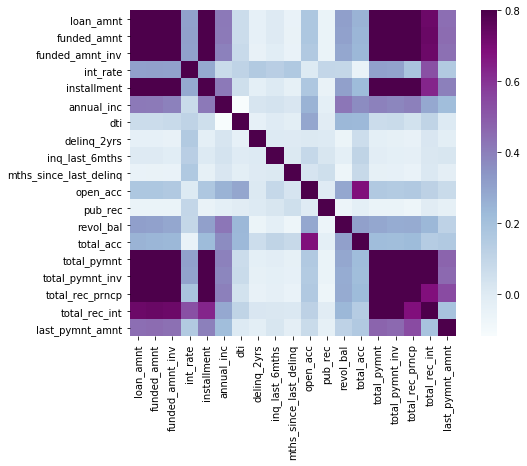

In [186]:
# Print correlation matrix to understand the correlation of all numerical variables
matrix = loan_dataset_cleaned1[X_features].corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [187]:
# Above correlation Plot shows:Loan amount ,funded amount ,funded amount inv,total payment inv,total rec prncp all are highlty correlated which is making sense in this problem: We need to create derived ratio like loan to fund amount ratio etc

# Default Variable Creation

In [382]:
# Create new variable for Default Status
#elite only
loan_dataset_cleaned1.loc[loan_dataset_cleaned1['loan_status'] == 'Charged Off', 'loan_status_modf'] = '0:Default' ## Default 
loan_dataset_cleaned1.loc[loan_dataset_cleaned1['loan_status'] == 'Current', 'loan_status_modf'] = '1:Non Default' ## Non Default
loan_dataset_cleaned1.loc[loan_dataset_cleaned1['loan_status'] == 'Fully Paid', 'loan_status_modf'] = '1:Non Default' ## Non Default

In [383]:
loan_dataset_cleaned1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_month', 'issue_year', 'annual_inc_range',
       'int_rate_range', 'loan_status_modf'],
      dtype='object')

# Segmented Univariate Analysis for Target Variable

# Default Rate

In [384]:
rate = pd.pivot_table(loan_dataset_cleaned1,index=['loan_status_modf'],values=["member_id"],aggfunc=[np.count_nonzero]).astype(np.int64).stack(level=0)
group_data = rate.groupby(level=1).transform(lambda x: x/x.sum())

In [385]:
def perc(group_data, pos):
    'The two args are the value and tick position'
    return (round((group_data*100),0)) 

In [387]:
group_data.head()

,,member_id
loan_status_modf,,
0:Default,count_nonzero,0.141773
1:Non Default,count_nonzero,0.858227


In [388]:
formatter1 = FuncFormatter(perc)
%pylab
fig1 = group_data.plot.bar(color="blue")
fig1.set_ylabel('Default Rate %')
fig1.set_xlabel('Loan Status')
fig1.set_xticklabels( ('Default','Non Default') )
fig1.set_title('Default Rate Plot')
plt.xticks(rotation=360)
fig1.legend_.remove()
fig1.yaxis.set_major_formatter(formatter1)
for i, each in enumerate(group_data.index):
    for col in group_data.columns:
        y = group_data.ix[each][col]
        fig1.text(i, y, str(round((y*100),2)) + '%' ,fontsize=12,ha="center", va="bottom")

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# Term vs Default Status

In [392]:
%pylab
term=pd.crosstab(loan_dataset_cleaned1['term'],loan_dataset_cleaned1['loan_status_modf']).apply(lambda r: r/r.sum(), axis=1)
fig = term.div(term.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('Term')
p = plt.ylabel('Default Rate %')
def perc(fig, pos):
    'The two args are the value and tick position'
    return (round((fig*100),0)) 
formatter1 = FuncFormatter(perc)
plt.xticks(rotation=360)
fig.yaxis.set_major_formatter(formatter1)
for i, each in enumerate(term.index):
    for col in term.columns:
        y = term.ix[each][col]
        fig.text(i, y, str(round((y*100),1)) + '%' ,fontsize=12,ha="center", va="top")
# Note: Long term loans(60 months) will have higher default rate


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\DD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


# Grade vs Default Status

In [393]:
%pylab
grade=pd.crosstab(loan_dataset_cleaned1['grade'],loan_dataset_cleaned1['loan_status_modf']).apply(lambda r: r/r.sum(), axis=1)
fig = grade.div(grade.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('Grade')
p = plt.ylabel('Default Rate %')
def perc(fig, pos):
    'The two args are the value and tick position'
    return (round((fig*100),0)) 
formatter1 = FuncFormatter(perc)
plt.xticks(rotation=360)
fig.yaxis.set_major_formatter(formatter1)
for i, each in enumerate(grade.index):
    for col in grade.columns:
        y = grade.ix[each][col]
        fig.text(i, y, str(round((y*100),1)) + '%' ,fontsize=12,ha="center", va="top")

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\DD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


# Sub-grade vs Default Status

loan_status_modf  0:Non Default  1:Default
sub_grade                                 
A1                         1107         30
A2                         1426         74
A3                         1692        103
A4                         2692        178
A5                         2509        215
B1                         1648        169
B2                         1813        225
B3                         2555        335
B4                         2169        327
B5                         2336        356
C1                         1783        332
C2                         1674        320
C3                         1250        269
C4                         1016        211
C5                          968        208
D1                          757        167
D2                         1070        270
D3                          907        254
D4                          757        213
D5                          658        207
E1                          560        197
E2         

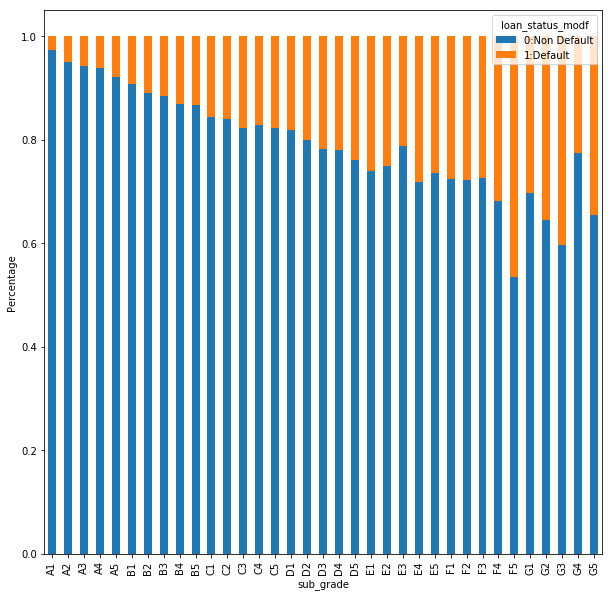

In [124]:
print(pd.crosstab(loan_dataset_cleaned1['sub_grade'],loan_dataset_cleaned1['loan_status_modf']))

grade=pd.crosstab(loan_dataset_cleaned1['sub_grade'],loan_dataset_cleaned1['loan_status_modf'])
grade.div(grade.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('sub_grade')
p = plt.ylabel('Percentage')
# Note: Grade F5 & G3 are top most sub-grades which will have higher default rate

# Employment length vs Default Status

In [401]:
%pylab
emp_length=pd.crosstab(loan_dataset_cleaned1['emp_length'],loan_dataset_cleaned1['loan_status_modf']).apply(lambda r: r/r.sum(), axis=1)
fig = emp_length.div(emp_length.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('Employee Length')
p = plt.ylabel('Default Rate %')
def perc(fig, pos):
    'The two args are the value and tick position'
    return (round((fig*100),0)) 
formatter1 = FuncFormatter(perc)
plt.xticks(rotation=360)
fig.yaxis.set_major_formatter(formatter1)
for i, each in enumerate(emp_length.index):
    for col in emp_length.columns:
        y = emp_length.ix[each][col]
        fig.text(i, y, str(round((y*100),1)) + '%' ,fontsize=9,ha="center", va="top")

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


C:\Users\DD\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


# Home ownership vs Default Status

loan_status_modf  0:Non Default  1:Default
home_ownership                            
MORTGAGE                  15192       2314
OWN                        2600        440
RENT                      16017       2831


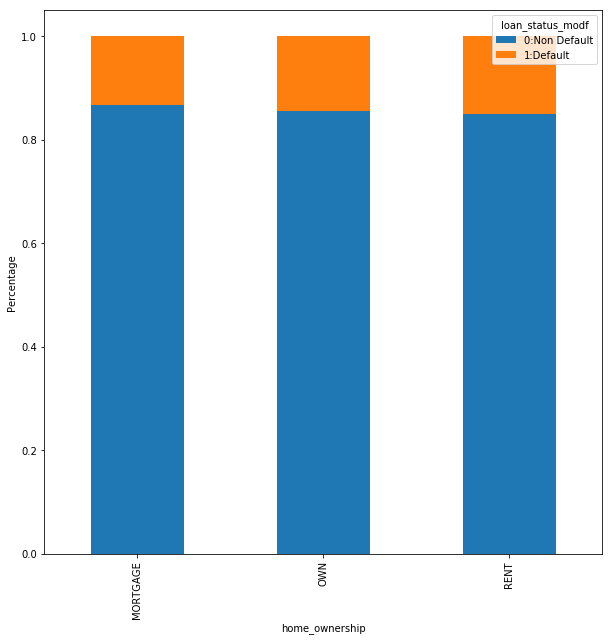

In [126]:
print(pd.crosstab(loan_dataset_cleaned1['home_ownership'],loan_dataset_cleaned1['loan_status_modf']))

home_ownership=pd.crosstab(loan_dataset_cleaned1['home_ownership'],loan_dataset_cleaned1['loan_status_modf'])
home_ownership.div(home_ownership.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('home_ownership')
p = plt.ylabel('Percentage')
# Note: Home ownership doesn't show any impact on default rate

In [127]:
# verification_status vs Default Status

loan_status_modf     0:Non Default  1:Default
verification_status                          
Not Verified                 14680       2125
Source Verified               8479       1425
Verified                     10650       2035


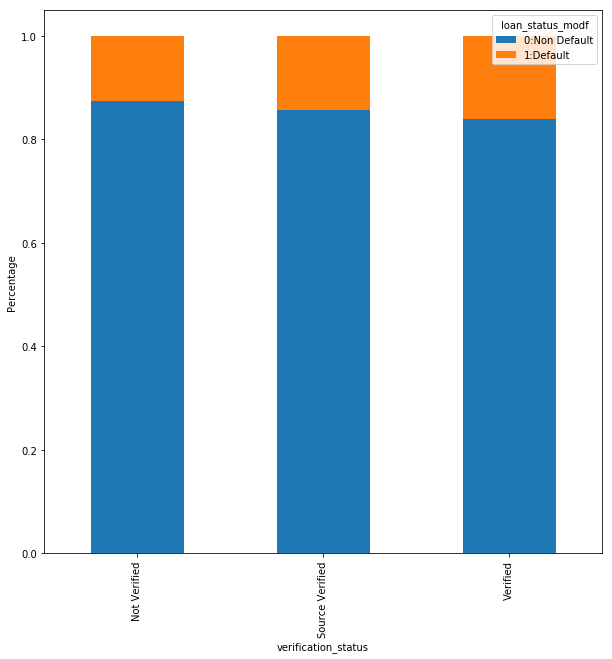

In [128]:
print(pd.crosstab(loan_dataset_cleaned1['verification_status'],loan_dataset_cleaned1['loan_status_modf']))

verification_status=pd.crosstab(loan_dataset_cleaned1['verification_status'],loan_dataset_cleaned1['loan_status_modf'])
verification_status.div(verification_status.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('verification_status')
p = plt.ylabel('Percentage')
# Note:verification_status doesn't show any impact on default rate

# Purpose vs Default Status

loan_status_modf    0:Non Default  1:Default
purpose                                     
car                          1386        159
credit_card                  4560        539
debt_consolidation          15766       2753
educational                   265         56
home_improvement             2578        340
house                         315         59
major_purchase               1949        220
medical                       580        106
moving                        487         90
other                        3333        628
renewable_energy               82         19
small_business               1336        469
vacation                      328         53
wedding                       844         94


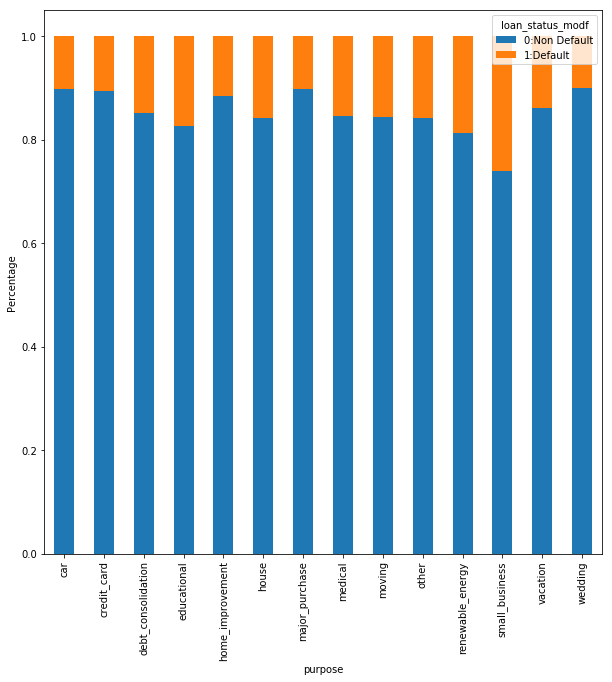

In [129]:
print(pd.crosstab(loan_dataset_cleaned1['purpose'],loan_dataset_cleaned1['loan_status_modf']))

purpose=pd.crosstab(loan_dataset_cleaned1['purpose'],loan_dataset_cleaned1['loan_status_modf'])
purpose.div(purpose.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('purpose')
p = plt.ylabel('Percentage')
# Note:small business,renewable energy and education loans have highre default rate

# Annual income vs Default

loan_status_modf  0:Non Default  1:Default
annual_inc_range                          
0-20000                     949        237
20000-40000                7155       1508
40000-60000                9857       1725
60000-80000                6823       1019
80000-100000               4139        529
100000 and above           4886        567


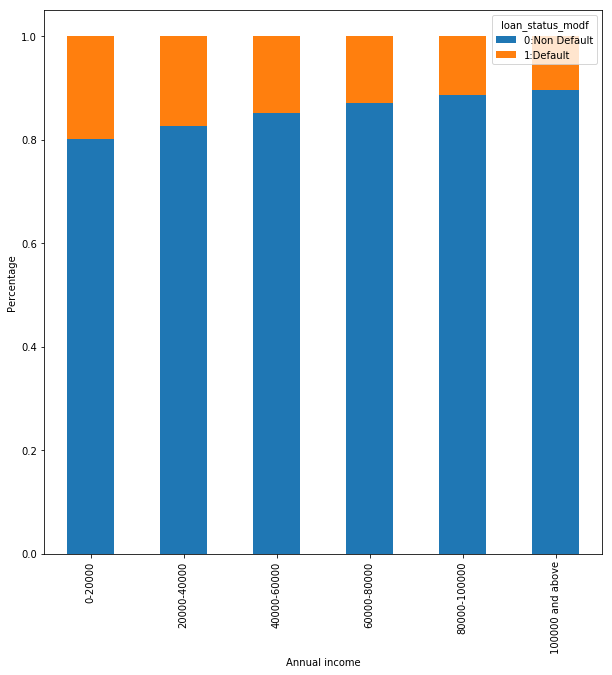

In [130]:
print(pd.crosstab(loan_dataset_cleaned1['annual_inc_range'],loan_dataset_cleaned1['loan_status_modf']))

purpose=pd.crosstab(loan_dataset_cleaned1['annual_inc_range'],loan_dataset_cleaned1['loan_status_modf'])
purpose.div(purpose.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('Annual income')
p = plt.ylabel('Percentage')
# Note: applicants with lesser annual income default the most 

# Interest rate vs Default

loan_status_modf  0:Non Default  1:Default
int_rate_range                            
0-7.5                      5105        256
7.5-10                     6388        570
10-12.5                    8353       1219
12.5-15                    7600       1469
15-above                   5801       1779


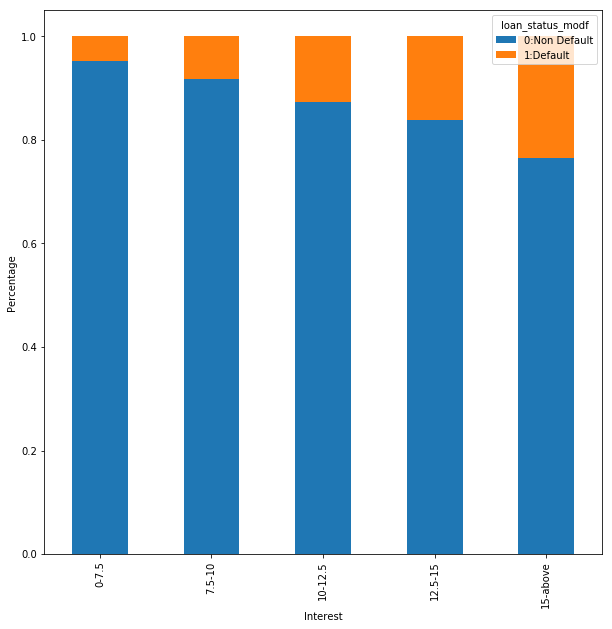

In [131]:
print(pd.crosstab(loan_dataset_cleaned1['int_rate_range'],loan_dataset_cleaned1['loan_status_modf']))

purpose=pd.crosstab(loan_dataset_cleaned1['int_rate_range'],loan_dataset_cleaned1['loan_status_modf'])
purpose.div(purpose.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,10))
plt.xlabel('Interest')
p = plt.ylabel('Percentage')
# Note: loans with higher interest are defaulted the most 